---
## KBO 타자 OPS 분석 및 예측

DATE : 2020-08-25

ANALYST : Dongwon

PURPOSE : KBO 리그 타자들의 예측변수를 통해 2019년 상반기 OPS를 예측하는 모델 분석

* OPS : 장타율과 출루율을 합친 타자들의 역량분석을 위한 지표

### Variable Description

#### Regular_Season_Batter : 정규 시즌 타자별 데이터

batter_id : 타자의 고유 아이디  
batter_name : 타자 이름  
year : 년도  
team : 소속팀  
avg : 타율  
G : 출전게임수  
AB : 타수 (타석, 볼넷, 사구, 희생번트, 희생플라이)  
R : 득점  
H : 안타 (1루타, 2루타, 3루타, 홈런)  
2B : 2루타  
3B : 3루타  
HR : 홈런  
TB : 루타 수  
RBI : 타점   
SB : 도루 성공  
CS : 도루 실패  
BB : 볼넷  
HBP : 사구  
SO : 삼진아웃  
GDP : 병살타  
SLG : 장타율  
OBP : 출루율  
E : 에러  
height/weight : 선수의 키/몸무게  
year_born : 선수의 생년월일  
position : 선수의 수비위치  
career : 선수의 커리어  
starting_salary : 입단 연봉  
OPS : OBP + SLG  

#### Regular_Season_Batter_Day_by_Day : 2018년도 일별 타자 데이터


date : 경기 날짜  
opposing_team : 상대팀  
avg1 : 해당 경기 타율   
avg2 : 누적 타율  

 * 중복된 데이터 설명은 생략

# OVERHEAD

In [4]:
#분석을 위한 패키지 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 150

In [5]:
#정규시즌 타자 데이터 csv파일 read 
regular = pd.read_csv('../data/Regular_Season_Batter.csv')
regular.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


- 1번 인덱스 번호인 2011년의 강경학 선수의 데이터같은 경우 적은 출전 게임수와 타수가 거의 없기 때문에 값들이 0 으로 나오는 것을 확인할 수 있다.
- starting_salary 변수의 경우 '@@만원' 처럼 숫자만 있는게 아닌 화폐단위가 섞인 문자열인 것을 확인할 수 있다.
- height/weight 변수의 경우 단위가 함께 적혀있어 문자열이고 몸무게와 키가 동시에 적혀 있기 때문에 처리가 필요한 데이터임을 알 수 있다. 
- career 변수의 경우 외국 선수일 경우 한글이 아닌 영어로 표기되는 것을 확인 할 수 있다.


# EDA

In [7]:
# EDA를 위한 데이터 셋 생성
df = regular[['batter_name','year','AB','position','OPS']]

In [8]:
#유니크한 타자들의 이름 갯 수 
df['batter_name'].nunique()

345

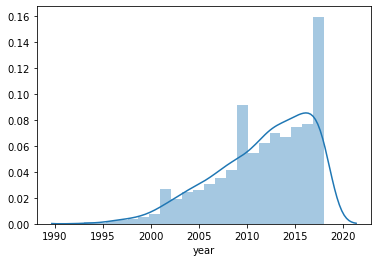

In [11]:
sns.distplot(df['year'])

year가 늘어날수록, 년도가 진행될 수록 데이터가 많아진다

In [12]:
df['year'].describe()

count    2454.000000
mean     2011.614507
std         4.992833
min      1993.000000
25%      2008.000000
50%      2013.000000
75%      2016.000000
max      2018.000000
Name: year, dtype: float64

1993년~ 2018년데이터다. 갯수는 2454개

In [15]:
df['AB'].describe()

count    2454.000000
mean      201.514670
std       169.537029
min         0.000000
25%        38.250000
50%       163.000000
75%       357.500000
max       600.000000
Name: AB, dtype: float64

평균 : 201  
50%(중앙값) : 163


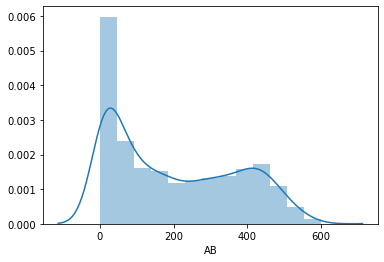

In [16]:
sns.distplot(df['AB'])

0 ~ 100 타석 선수가 굉장히 많다

In [19]:
#포지션 변수의 유니크 값
df['position'].unique()

array(['내야수(우투우타)', '내야수(우투좌타)', '외야수(우투좌타)', nan, '포수(우투우타)',
       '외야수(우투양타)', '외야수(우투우타)', '외야수(좌투좌타)', '포수(우투좌타)', '내야수(좌투좌타)',
       '내야수(우투양타)'], dtype=object)

In [20]:
#포지션 별 데이터 갯 수
df['position'].value_counts()

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
외야수(우투양타)      7
내야수(우투양타)      7
Name: position, dtype: int64

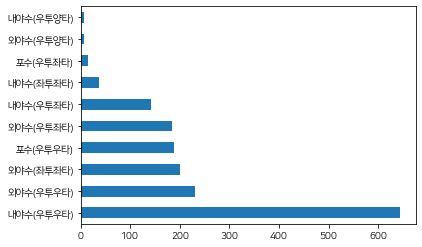

In [23]:
plt.rcParams["font.family"] = 'NanumSquare_ac'
df['position'].value_counts().plot(kind='barh')

양타선수가 굉장히 적다. 내야수 우투우타는 굉장히 많다.

In [32]:
#타겟 변수인 OPS의 통계치
df['OPS'].describe()

count    2428.000000
mean        0.649939
std         0.261634
min         0.000000
25%         0.546000
50%         0.688637
75%         0.797234
max         4.000000
Name: OPS, dtype: float64

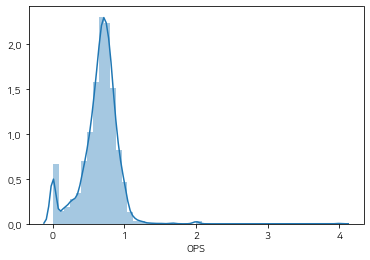

In [33]:
sns.distplot(df['OPS'])

distplot 확인 결과 오른쪽으로 꼬리가 길게 치우친 right-skewed 형태를 띔. OPS가 4인 (매우 높은) 이상치 발견

OPS가 굉장히 높은 선수들이 있다. -> Outlier 이상치  
OPS가 0인 선수들이 많다.

### 특성 간 상관관계

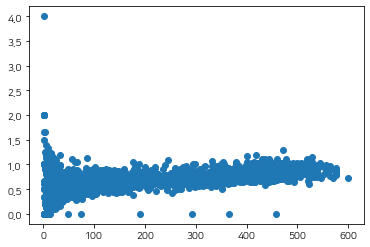

In [36]:
#타석과 OPS 간의 관계 (숫자형~숫자형)
plt.scatter(df['AB'],df['OPS'])

타석이 많을수록 OPS가 증가하는 경향을 보인다.

In [40]:
#포지션 OPS관계 (카테고리~숫자형)
df.groupby('position').mean()['OPS']

position
내야수(우투양타)    0.275000
내야수(우투우타)    0.674866
내야수(우투좌타)    0.642086
내야수(좌투좌타)    0.748972
외야수(우투양타)    0.697714
외야수(우투우타)    0.665179
외야수(우투좌타)    0.685956
외야수(좌투좌타)    0.656005
포수(우투우타)     0.613227
포수(우투좌타)     0.592643
Name: OPS, dtype: float64

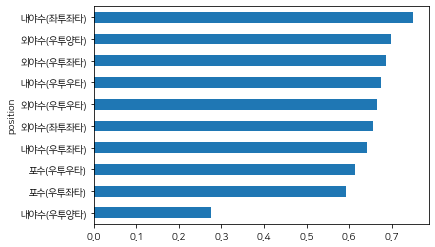

In [44]:
df.groupby('position').mean()['OPS'].sort_values().plot(kind='barh')

포수가 대체적으로 OPS가 낮다. 양타의 경우 외야수, 내야수일때랑 격차가 심하다. 좌타선수가 OPS가 높다.

# EDA - Insight

1. batter_name : 345명의 타자가있다.
2. year : 1993~2018년까지 존재. 시간이 지날수록 데이터 건수가 많다.
3. AB : 타석수가 0~100 타석수를 가진 선수가 많다.
4. position : 양타선수가 굉장히 적고 내야수 우투양타가 굉장히 많다.
5. OPS : OPS가 말도 안되게 높은 선수가 몇 있고 0인 선수도 꽤 있다.
6. 타석과 OPS간 양의 상관관계를 확인할 수 있다.
7. 포수가 대체적으로 OPS가 낮으며 양타의 경우 외야수, 내야수일때랑 격차가 심하다. 좌타선수가 OPS가 높다.

---
# Feature Engineering

#### Time lag Feature

In [12]:
#OPS 변수의 time_lag (시차) 변수 생성. 시차 -1  
lag_1_OPS = []
for i in range(len(regular)):
    if len(regular.loc[(regular['batter_name'] == regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)]['OPS']) == 0:
        lag_1_OPS.append(np.nan)
    else:
        
        lag_1_OPS.append(regular.loc[(regular['batter_name'] == regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)]['OPS'].iloc[0])

In [13]:
#시차 1 OPS 변수 확인
lag_1_OPS

[nan,
 nan,
 nan,
 0.6859999999999999,
 0.6729999999999999,
 0.489,
 0.552,
 nan,
 nan,
 0.6000000000000001,
 0.0,
 0.0,
 nan,
 0.41548691548691546,
 0.5205314009661836,
 0.0,
 nan,
 0.5156862745098039,
 0.5942622950819672,
 nan,
 0.6157974660067002,
 0.6628473301653566,
 0.5755494505494505,
 0.7380967135568363,
 0.8312472226336839,
 0.8156615074423293,
 0.8472435300021507,
 0.8338632787732194,
 0.7573354363672546,
 0.7489311367004903,
 0.6673319411033862,
 0.7796059017666472,
 0.653967281952585,
 0.7850834027304616,
 0.7601225934559268,
 0.7746134374911122,
 0.7532228360957642,
 0.8235294117647058,
 nan,
 0.0,
 0.0,
 nan,
 nan,
 0.0,
 0.6080000000000001,
 0.6729999999999999,
 0.7559999999999999,
 0.85,
 0.758,
 0.9,
 0.846,
 0.823,
 0.742,
 0.767,
 1.06,
 0.982,
 0.843,
 nan,
 nan,
 0.6693376068376069,
 0.5435897435897437,
 0.5352941176470588,
 0.7579064128359903,
 0.7092731829573935,
 0.7304304304304304,
 0.7972689075630253,
 0.7620137299771168,
 0.8335172822224615,
 0.51946107784431

In [17]:
#만든 시차 1 OPS변수를 기존 데이터프레임에 추가
regular['lag_1_OPS'] = lag_1_OPS

In [14]:
#위와 같은 방법으로 avg 변수의 시차 1 변수 생성
lag_1_avg = []
for i in range(len(regular)):
    if len(regular.loc[(regular['batter_name'] == regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)]['avg']) == 0:
        lag_1_avg.append(np.nan)
    else:
        
        lag_1_avg.append(regular.loc[(regular['batter_name'] == regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)]['avg'].iloc[0])

In [18]:
#기존 데이터프레임에 시차 1 avg 변수 추가
regular['lag_1_avg'] = lag_1_avg

In [16]:
#나머지 수치형 변수들도 시차 1 변수 생성을 위해 확인
regular.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS'],
      dtype='object')

In [19]:
#위 과정을 반복문으로 수행하여 모든 수치형 변수에 시차 1 변수 추가
for j in ['G', 'AB', 'R', 'H','2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP','SLG', 'OBP', 'E'] :
    lag_1_temp = []
    for i in range(len(regular)):
        if len(regular.loc[(regular['batter_name'] == regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)][j]) == 0:
            lag_1_temp.append(np.nan)
        else:

            lag_1_temp.append(regular.loc[(regular['batter_name'] == regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)][j].iloc[0])
    regular['lag_1_'+j] = lag_1_temp

In [20]:
#확인
regular


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,lag_1_RBI,lag_1_SB,lag_1_CS,lag_1_BB,lag_1_HBP,lag_1_SO,lag_1_GDP,lag_1_SLG,lag_1_OBP,lag_1_E
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,7.0,0.0,0.0,13.0,2.0,28.0,1.0,0.349,0.337,6.0
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,27.0,4.0,3.0,40.0,5.0,58.0,3.0,0.325,0.348,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000,0.000,0.0
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.000,0.000,0.0


#### Total Feature

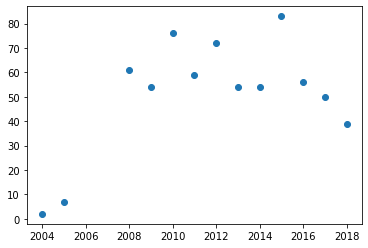

In [48]:
#박석민 선수의 년도별 BB 특성 산점도
plt.scatter(regular.loc[regular['batter_name']=='박석민']['year'],regular.loc[regular['batter_name']=='박석민']['BB'])

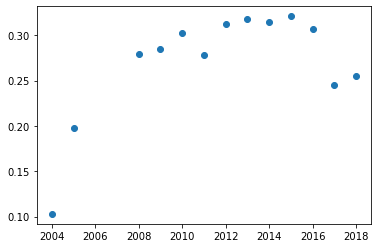

In [49]:
#박석민 선수의 년도별 avg 특성 산점도
plt.scatter(regular.loc[regular['batter_name']=='박석민']['year'],regular.loc[regular['batter_name']=='박석민']['avg'])

lag 변수는 전년도 성적과 다음년도 성적이 비슷할때, 즉 변동성이 적을 때 사용하면 좋다. 전년도 성적과 그 다음년도 성적이 비슷하지않고 들쑥날쑥한다면 lag변수보다 전체 평균 변수를 사용하는 것이 좋다. 이러한 변동성은 자기상관계수를 통해 확인할 수 있다.

### 변동성 확인 (자기상관계수)

In [35]:
#자기상관계수를 확인하는 함수 생성 (기존 변수와 시차 변수 간 상관계수를 구하면 됨)
def get_self_corr(var):    
    x = []
    y = []
    regular1 = regular.loc[regular['AB']>=100,]

    for name in regular1['batter_name'].unique():
        a = regular1.loc[regular1['batter_name']==name,]
        k = []
        for i in a['year'].unique():
            if (a['year']==i+1).sum()>0:
                k.append(i)
        for i in k:
            x.append(a.loc[a['year']==i,var].iloc[0])
            y.append(a.loc[a['year']==i+1,var].iloc[0])
    return pd.Series(x).corr(pd.Series(y))


In [33]:
regular.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS', 'lag_1_OPS', 'lag_1_avg', 'lag_1_G',
       'lag_1_AB', 'lag_1_R', 'lag_1_H', 'lag_1_2B', 'lag_1_3B', 'lag_1_HR',
       'lag_1_TB', 'lag_1_RBI', 'lag_1_SB', 'lag_1_CS', 'lag_1_BB',
       'lag_1_HBP', 'lag_1_SO', 'lag_1_GDP', 'lag_1_SLG', 'lag_1_OBP',
       'lag_1_E'],
      dtype='object')

In [36]:
#수치형 변수 모두의 자기상관계수 확인을 위한 반복문
agg = {}
for i in ['avg', 'G', 'AB', 'R', 'H','2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP','SLG', 'OBP', 'E']:
    agg[i] = get_self_corr(i)



In [38]:
#안타 변수에 2루타, 3루타, 홈런 변수를 빼서 1루타 변수 생성 및 자기상관계수 확인
regular['1B'] = regular['H'] - regular['2B'] -regular['3B'] - regular['HR']
agg['1B'] = get_self_corr('1B')

In [39]:
#계산된 자기 상관 계수
agg

{'avg': 0.4240676119058767,
 'G': 0.2827945222858422,
 'AB': 0.5345220495165055,
 'R': 0.6226214086043597,
 'H': 0.5780431760833786,
 '2B': 0.5150624616599283,
 '3B': 0.440879695238331,
 'HR': 0.7412597496536674,
 'TB': 0.634394472185906,
 'RBI': 0.6519474150977963,
 'SB': 0.7260764196191684,
 'CS': 0.5732143724546755,
 'BB': 0.6537531676446486,
 'HBP': 0.5627917256433471,
 'SO': 0.5664029028016611,
 'GDP': 0.4902224105414654,
 'SLG': 0.6139336781007896,
 'OBP': 0.5452616730047511,
 'E': 0.6225595423969386,
 '1B': 0.5363838342038814}

신뢰성이 있는 지표 : 홈런, 삼진, 볼넷 (lag 변수이용)  
신뢰성이 낮은 지표 : 3루타, avg,1루타 .. (누적성적이용) 

---
### 누적성적 변수 (Total 변수) 생성

신뢰성이 낮은 지표였던 3루타, avg, 1루타 세가지 변수에 대한 누적 성적 변수 생성  
- 1루타 누적 변수 : 전체 1루타 수/전체 타석수
- 3루타 누적 변수 : 전체 3루타 수/전체 타석수
- avg 누적 변수 : 타율 * 타석수 / 타석수


In [53]:
#강경학선수를 예시로 2016년도의 1루타 누적변수 확인 
regular.loc[(regular['batter_name']=='강경학')&(regular['year']<2016),'1B'].sum()/regular.loc[(regular['batter_name']=='강경학')&(regular['year']<2016),'AB'].sum()

0.20100502512562815

In [54]:
# 3루타 누적 변수 확인
regular.loc[(regular['batter_name']=='강경학')&(regular['year']<2016),'3B'].sum()/regular.loc[(regular['batter_name']=='강경학')&(regular['year']<2016),'AB'].sum()

0.017587939698492462

In [57]:
# avg 누적 변수 확인
a = regular.loc[(regular['batter_name']=='강경학')&(regular['year']<2016)]
(a['avg']*a['AB']).sum()/a['AB'].sum()

0.24857537688442213

In [58]:
#위에서 테스트 했던 공식을 토대로 세가지 누적 변수 생성
total_1BnAB = []
total_3BnAB = []
total_avg = []
for i in range(len(regular)):
    a = regular.loc[(regular['batter_name']==regular['batter_name'].iloc[i])&(regular['year']<regular['year'].iloc[i])]
    total_1BnAB.append(a['1B'].sum()/a['AB'].sum())
    total_3BnAB.append(a['3B'].sum()/a['AB'].sum())
    total_avg.append((a['avg']*a['AB']).sum()/a['AB'].sum())
    
    

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Us

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Us

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Us

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Us

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Us

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Us

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Us

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  impo

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Us

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Us

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Us

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Us

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/Us

In [60]:
#기존 데이터프레임에 병합
regular['total_1BnAB'] = total_1BnAB
regular['total_3BnAB'] = total_3BnAB
regular['total_avg'] = total_avg

# LightGBM 이용하여 2019년 OPS 예측

In [83]:
#예측을 위해 19년 데이터 프레임 생성 (이름, 경력, 포지션, 초봉 등 년도에 따라 바뀌는 변수는 그대로 입력하고 그 외 수치형 변수는 모두 0으로 기입)
agg = {}
for i in regular.columns[:29]:
    agg[i] = []
for i in regular.loc[regular['year']==2018,'batter_name'].unique():
    for j in regular.columns:
        if j in ['batter_id','batter_name','team','height/weight','year_born','position','starting_salary','career']:
            agg[j].append(regular.loc[regular['batter_name']==i,j].iloc[0])
        elif j in ['avg', 'G', 'AB', 'R', 'H','2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP','SLG', 'OBP', 'E','OPS']:
            agg[j].append(0)
        elif j =='year':
            agg[j].append(2019)
    

In [87]:
origin_regular = regular[regular.columns[:29]]

In [91]:
# 기존 데이터프레임 + 19년도 데이터프레임 병합
regular=pd.concat([origin_regular,pd.DataFrame(agg,columns=regular.columns[:29])])

In [92]:
regular

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,337,홍재호,2019,KIA,0.000,0,0,0,0,0,...,0,0.000,0.000,0,180cm/79kg,1987년 05월 10일,내야수(우투우타),부산대연초-대천중-부산고-고려대-KIA-경찰,4000만원,0.000
223,338,홍창기,2019,LG,0.000,0,0,0,0,0,...,0,0.000,0.000,0,189cm/94kg,1993년 11월 21일,외야수(우투좌타),대일초-매송중-안산공고-건국대-LG-경찰,8000만원,0.000
224,341,황윤호,2019,NC,0.000,0,0,0,0,0,...,0,0.000,0.000,0,177cm/78kg,1993년 09월 22일,내야수(우투우타),수주초-신월중-장충고-NC-경찰-NC,3000만원,0.000
225,342,황재균,2019,현대,0.000,0,0,0,0,0,...,0,0.000,0.000,0,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.000


In [93]:
#기존 + 19년 데이터프레임으로 time_lag 변수 생성 
for j in ['avg','G', 'AB', 'R', 'H','2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP','SLG', 'OBP', 'E'] :
    lag_1_temp = []
    for i in range(len(regular)):
        if len(regular.loc[(regular['batter_name'] == regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)][j]) == 0:
            lag_1_temp.append(np.nan)
        else:

            lag_1_temp.append(regular.loc[(regular['batter_name'] == regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)][j].iloc[0])
    regular['lag_1_'+j] = lag_1_temp

In [113]:
#total 변수 생성
regular['1B'] = regular['H'] - regular['2B'] -regular['3B'] - regular['HR']
total_1BnAB = []
total_3BnAB = []
total_avg = []
for i in range(len(regular)):
    a = regular.loc[(regular['batter_name']==regular['batter_name'].iloc[i])&(regular['year']<regular['year'].iloc[i])]
    total_1BnAB.append(a['1B'].sum()/a['AB'].sum())
    total_3BnAB.append(a['3B'].sum()/a['AB'].sum())
    total_avg.append((a['avg']*a['AB']).sum()/a['AB'].sum())

regular['total_1BnAB'] = total_1BnAB
regular['total_3BnAB'] = total_3BnAB
regular['total_avg'] = total_avg
    

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarni

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarni

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarni

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarni

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarni

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarni

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarni

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarni

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarni

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarni

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarni

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarni

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarni

In [102]:
#FE가 끝난 데이터 셋
regular

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,lag_1_SB,lag_1_CS,lag_1_BB,lag_1_HBP,lag_1_SO,lag_1_GDP,lag_1_SLG,lag_1_OBP,lag_1_E,1B
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,0.0,0.0,13.0,2.0,28.0,1.0,0.349,0.337,6.0,67
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,4.0,3.0,40.0,5.0,58.0,3.0,0.325,0.348,15.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,337,홍재호,2019,KIA,0.000,0,0,0,0,0,...,0.0,0.0,8.0,0.0,12.0,2.0,0.382,0.333,4.0,0
223,338,홍창기,2019,LG,0.000,0,0,0,0,0,...,0.0,1.0,7.0,0.0,8.0,0.0,0.278,0.400,0.0,0
224,341,황윤호,2019,NC,0.000,0,0,0,0,0,...,2.0,2.0,0.0,3.0,6.0,2.0,0.175,0.200,3.0,0
225,342,황재균,2019,현대,0.000,0,0,0,0,0,...,14.0,7.0,49.0,4.0,120.0,5.0,0.526,0.358,17.0,0


In [114]:
#머신러닝 모델에 학습시킬 변수 리스트 생성
#이번 프로젝트에서는 생성한 time_lag 변수와 total 변수만 사용
input_var = [x for x in regular.columns if ('lag_' in x)|('total_' in x)]

In [115]:
#input 변수들 확인
input_var

['lag_1_avg',
 'lag_1_G',
 'lag_1_AB',
 'lag_1_R',
 'lag_1_H',
 'lag_1_2B',
 'lag_1_3B',
 'lag_1_HR',
 'lag_1_TB',
 'lag_1_RBI',
 'lag_1_SB',
 'lag_1_CS',
 'lag_1_BB',
 'lag_1_HBP',
 'lag_1_SO',
 'lag_1_GDP',
 'lag_1_SLG',
 'lag_1_OBP',
 'lag_1_E',
 'total_1BnAB',
 'total_3BnAB',
 'total_avg']

In [116]:
#18년까지의 데이터를 훈련셋으로 지정 19년도 데이터는 우리가 구해야할 데이터셋이므로 테스트셋으로 지정
train = regular.loc[regular['year']<=2018]
train = train.loc[-train['OPS'].isnull()]

test = regular.loc[regular['year']==2019]

In [117]:
#훈련셋의 인풋 변수들을 X, 타겟변수인 OPS 를 y로 저장
X=train[input_var]
y=train['OPS']

In [123]:
#lightgbm 패키지를 로드

import lightgbm as lgb

#머신러닝 모델에 지정해줄 하이퍼파라미터값
params = {'num_leaves':100,
         'min_data_in_leaf':30,
         'objective':'regression',
         'max_depth':6,
         'learning_rate':0.02,
         'boosting':'gbdt',
         'feature_fraction':0.7522,
         'bagging_freq':1,
         'bagging_fraction':0.7083,
         'bagging_seed':11,
         'metric':'rmse',
         'random_state':133}

#위에 만들어 놓았던 X, y를 lightgbm에서 제공하는 데이터 셋 형태로 변환
trn_data = lgb.Dataset(X,y,weight=train['AB'])
#800번 반복시행하여 학습
num_round = 800

#clf라는 이름의 객체로 lightgbm모델 생성 및 학습
clf = lgb.train(params, trn_data,num_round,valid_sets=[trn_data], verbose_eval=100,
               early_stopping_rounds=200)

#학습된 모델에 테스트 셋트를 입력하여 예측값 생성
predictions = clf.predict(test[input_var],num_iteration=clf.best_iteration)

Training until validation scores don't improve for 200 rounds
[100]	training's rmse: 0.10697
[200]	training's rmse: 0.100122
[300]	training's rmse: 0.0959457
[400]	training's rmse: 0.0927087
[500]	training's rmse: 0.0899289
[600]	training's rmse: 0.0875383
[700]	training's rmse: 0.0853977
[800]	training's rmse: 0.0834999
Did not meet early stopping. Best iteration is:
[800]	training's rmse: 0.0834999


훈련 과정중 rmse 값이 나옴. 그 중 best rmse에 따라 best iteration이 결정됨

In [125]:
sub = test[['batter_id','batter_name']]

In [126]:
sub['OPS'] = predictions

/Users/eastone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [127]:
#최종 예측 데이터셋
sub

,batter_id,batter_name,OPS
0,0,가르시아,0.725698
1,1,강경학,0.695272
2,2,강구성,0.655298
3,3,강민국,0.592210
4,4,강민호,0.795046
...,...,...,...
222,337,홍재호,0.630473
223,338,홍창기,0.737237
224,341,황윤호,0.567137
225,342,황재균,0.927451


In [130]:
#저장
sub.to_csv('../data/submission_baseball.csv',index=False)